# Objective
-Identify the Which Variable have more impact on House Price of Unit Area

-To build the Model which will help to Predict the Price of house based on Various parameter ( independent Variable )


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Rahul\Desktop\Soni_MBA\ML Assignment\Real estate.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# EDA
Missing Value

In [6]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# Outlier

<Axes: >

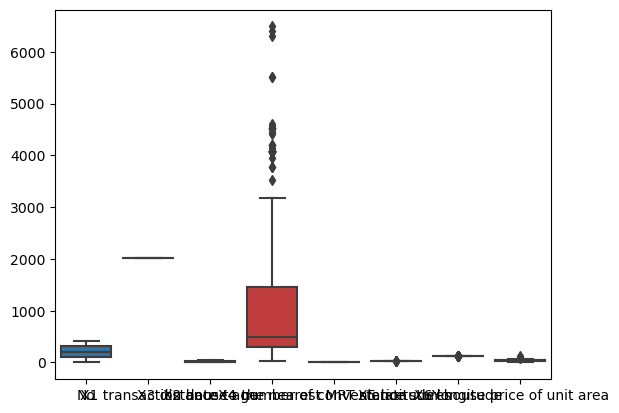

In [7]:
import seaborn as sns
sns.boxplot(data=df)

# Treatment of Outlier -- Winsorizing Technique

In [8]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

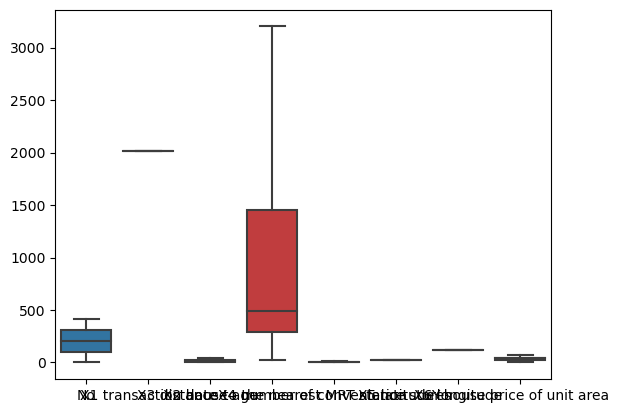

In [9]:
import seaborn as sns
sns.boxplot(data=df)

# Data Partition

In [12]:
X = df.drop('Y house price of unit area', axis= 1)
y = df[['Y house price of unit area']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [13]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Y house price of unit area,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
308,53.0,309,2013.417,16.4,289.3248,5,24.98203,121.54348
372,41.5,373,2013.000,33.9,157.6052,7,24.96628,121.54196
118,30.6,119,2013.500,25.3,1583.7220,3,24.96622,121.51709
67,56.8,68,2013.500,8.5,104.8101,5,24.96674,121.54067
225,49.0,226,2013.250,1.1,193.5845,6,24.96571,121.54089


# Correlation

In [14]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Y house price of unit area,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
Y house price of unit area,1.000000,-0.000577,0.068744,-0.218201,-0.715064,0.573012,0.589507,0.534213
No,-0.000577,1.000000,-0.026735,-0.016316,-0.035414,0.053674,-0.042024,-0.000284
X1 transaction date,0.068744,-0.026735,1.000000,0.004206,0.088778,0.020264,0.015273,-0.084732
X2 house age,-0.218201,-0.016316,0.004206,1.000000,0.018249,0.071219,0.070020,-0.049886
X3 distance to the nearest MRT station,-0.715064,-0.035414,0.088778,0.018249,1.000000,-0.657476,-0.608007,-0.760895
X4 number of convenience stores,0.573012,0.053674,0.020264,0.071219,-0.657476,1.000000,0.477452,0.466543
X5 latitude,0.589507,-0.042024,0.015273,0.070020,-0.608007,0.477452,1.000000,0.418845
X6 longitude,0.534213,-0.000284,-0.084732,-0.049886,-0.760895,0.466543,0.418845,1.000000


# Correlation
-No factor has been present to affect the variable of Price

-Multi-Colinearity is Absent

# Model Builiding

#### Method 2 -- Variable selection Method
1. Forward Selection Method
2. Backward Selection Method

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [17]:
Model.feature_names_in_

array(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype=object)

In [18]:
Model.get_feature_names_out()

array(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'], dtype=object)

# Method 2----Sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X_train = X_train.loc[:,['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude']]
X_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude
308,2013.417,16.4,289.3248,5,24.98203
372,2013.000,33.9,157.6052,7,24.96628
118,2013.500,25.3,1583.7220,3,24.96622
67,2013.500,8.5,104.8101,5,24.96674
225,2013.250,1.1,193.5845,6,24.96571


In [21]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
308,2013.417,16.4,289.3248,5,24.98203,53.0
372,2013.000,33.9,157.6052,7,24.96628,41.5
118,2013.500,25.3,1583.7220,3,24.96622,30.6
67,2013.500,8.5,104.8101,5,24.96674,56.8
225,2013.250,1.1,193.5845,6,24.96571,49.0


In [22]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [23]:
np.round(Model3.intercept_,3)

array([-16438.504])

In [24]:
np.round(Model3.coef_,4)

array([[ 4.825600e+00, -2.773000e-01, -6.300000e-03,  7.712000e-01,
         2.711324e+02]])

In [27]:
Model3.feature_names_in_

array(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'], dtype=object)

#### Model

* y = -16438.504 + 4.825600e+00 * Transaction date -2.773000e-01* House age-6.300000e-03 * Distance to the nearest MRT station +7.712000e-01* Number of convenience stores +2.711324e+02* Latitude

# Prediction on Train

In [30]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Y house price of unit area - train.fitted_value,2)
train.head()

SyntaxError: invalid syntax (2331883015.py, line 3)

KeyError: 'Resale'

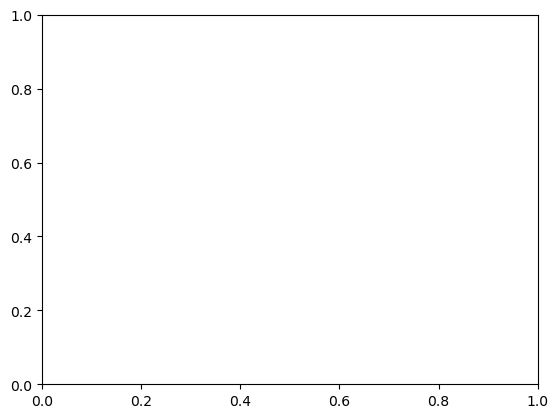

In [31]:
df.plot.scatter(x='Resale', y='Y house price of unit area', title='Price vs Resale')